# 06. Segment Analysis & Credit Policy Recommendation

## Mục tiêu
- Phân khúc doanh nghiệp SMEs dựa trên Credit Score (1–10)
- Phân tích đặc điểm rủi ro từng nhóm
- Đề xuất chính sách tín dụng phù hợp cho từng phân khúc

Notebook này tập trung vào **giá trị ứng dụng thực tế** của mô hình.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

PROJECT_ROOT = "/content/drive/MyDrive/NCKH"
DATA_PROCESSED = f"{PROJECT_ROOT}/data/processed"
SRC_DIR = f"{PROJECT_ROOT}/src"

import sys
sys.path.insert(0, SRC_DIR)

print("Environment ready")

Mounted at /content/drive
Environment ready


## Load dữ liệu đã được chấm điểm (Credit Scoring Output)

Dữ liệu này được tạo từ Notebook 04:
- PD đã calibration
- Credit Score từ 1–10

In [2]:
import pandas as pd

df_scored = pd.read_csv(f"{DATA_PROCESSED}/scored_test_data.csv")

df_scored.shape

(225, 43)

## Phân phối Credit Score

Kiểm tra:
- Quy mô từng phân khúc
- Score có bị lệch hay không

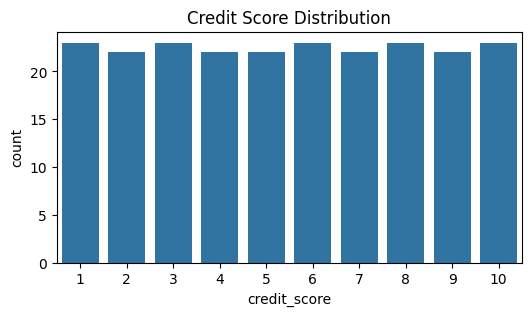

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,3))
sns.countplot(x="credit_score", data=df_scored)
plt.title("Credit Score Distribution")
plt.show()

## Xây dựng các phân khúc tín dụng (Credit Segments)

Dựa trên Credit Score:
- Low Risk: Score 8–10
- Medium Risk: Score 5–7
- High Risk: Score 1–4

Cách chia này:
- Dễ diễn giải
- Phù hợp thực tiễn tín dụng

In [4]:
def map_segment(score):
    if score >= 8:
        return "Low Risk"
    elif score >= 5:
        return "Medium Risk"
    else:
        return "High Risk"

df_scored["risk_segment"] = df_scored["credit_score"].apply(map_segment)

df_scored["risk_segment"].value_counts()

,count
risk_segment,
High Risk,90
Low Risk,68
Medium Risk,67


## So sánh Probability of Default giữa các phân khúc

In [5]:
segment_pd = df_scored.groupby("risk_segment")["PD"].agg(["mean","median","count"])
segment_pd

,mean,median,count
risk_segment,,,
High Risk,0.824872,1.00,90
Low Risk,0.000000,0.00,68
Medium Risk,0.024621,0.04,67


## Phân tích đặc điểm tài chính theo phân khúc

Mục tiêu:
- Hiểu vì sao các nhóm có mức rủi ro khác nhau
- Kết nối lại với kết quả SHAP

In [6]:
key_features = [
    "debt_to_assets",
    "debt_to_equity",
    "roa",
    "roe",
    "current_ratio",
    "cash_ratio"
]

df_scored.groupby("risk_segment")[key_features].mean()

,debt_to_assets,debt_to_equity,roa,roe,current_ratio,cash_ratio
risk_segment,,,,,,
High Risk,1.013422,3.342660,-0.160317,-0.512885,2.386369,0.169992
Low Risk,0.340082,0.635380,0.080233,0.128093,3.062124,0.521059
Medium Risk,0.384673,0.929662,0.098593,0.151084,3.730640,0.576642


## Trực quan hóa sự khác biệt giữa các phân khúc

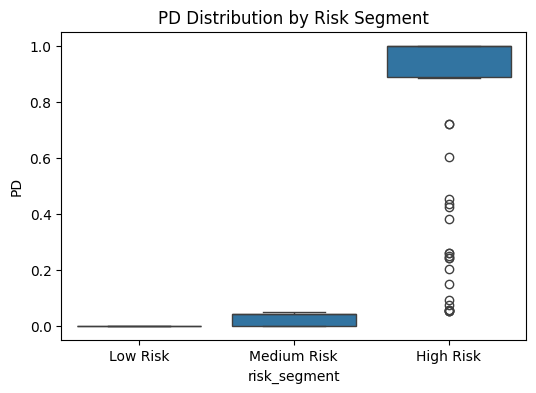

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x="risk_segment",
    y="PD",
    data=df_scored,
    order=["Low Risk","Medium Risk","High Risk"]
)
plt.title("PD Distribution by Risk Segment")
plt.show()

## Đề xuất chính sách tín dụng theo phân khúc

Dựa trên kết quả phân tích, đề xuất chính sách:

### Low Risk (Score 8–10)
- Phê duyệt nhanh
- Hạn mức cao
- Lãi suất ưu đãi
- Ít yêu cầu tài sản đảm bảo

### Medium Risk (Score 5–7)
- Phê duyệt có điều kiện
- Hạn mức trung bình
- Yêu cầu bổ sung tài sản đảm bảo
- Giám sát định kỳ

### High Risk (Score 1–4)
- Không phê duyệt hoặc yêu cầu tái cấu trúc
- Hạn mức thấp
- Yêu cầu bảo đảm cao
- Theo dõi sát dòng tiền


## Liên hệ với Explainability (SHAP)

- Các phân khúc rủi ro cao có:
  - Đòn bẩy tài chính cao
  - Khả năng sinh lời thấp
  - Dòng tiền yếu
- Kết quả phù hợp với SHAP analysis ở Notebook 05

## Tổng kết Notebook 06

Notebook này đã:
- Phân khúc SMEs theo Credit Score
- Phân tích sự khác biệt rủi ro giữa các nhóm
- Đề xuất chính sách tín dụng cụ thể

Đây là bước giúp mô hình có **giá trị ứng dụng thực tế**.